## Team Members
### Adila Abdulwahid
### Kevon Cambridge
### Kevin Stewart

GitHub Link: https://github.com/kjcambri/Team-6-Final-Project

In [229]:
# importing required libraries
%matplotlib inline

import seaborn as sns 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import KNNImputer
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import statsmodels.formula.api as sm
from dmba import classificationSummary, regressionSummary, exhaustive_search, gainsChart, liftChart
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [151]:
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(y_train, model.predict(x_train))
    print(title + ' - validation results')
    classificationSummary(y_test, model.predict(x_test))

In [152]:
#checking file directory
! ls

Well_3_fargo.ipynb
Wells Fargo (1).ipynb
Wells Fargo all models.ipynb
b765dc3d8076-Campus+Analytics+2021+Challenge+Rules-FINAL+(1) (1).docx
cadc27b08144-Data+Definitions+-+Campus+Challenge.xlsx
test.csv
test.xlsx
train.csv
train.xlsx
~$cadc27b08144-Data+Definitions+-+Campus+Challenge.xlsx


In [153]:
#loading the train and test dataset into a dataframe
train = pd.read_csv('train.csv')

In [154]:
#printing train dataframe head
train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [155]:
train.isna().sum()

TRAN_AMT                      0
ACCT_PRE_TRAN_AVAIL_BAL       0
CUST_AGE                      0
OPEN_ACCT_CT                  0
WF_dvc_age                    0
PWD_UPDT_TS                3125
CARR_NAME                  2709
RGN_NAME                   2709
STATE_PRVNC_TXT            2709
ALERT_TRGR_CD                 0
DVC_TYPE_TXT               1761
AUTHC_PRIM_TYPE_CD            0
AUTHC_SCNDRY_STAT_TXT        74
CUST_ZIP                      0
CUST_STATE                   36
PH_NUM_UPDT_TS             7061
CUST_SINCE_DT                 0
TRAN_TS                       0
TRAN_DT                       0
ACTN_CD                       0
ACTN_INTNL_TXT                0
TRAN_TYPE_CD                  0
ACTVY_DT                      0
FRAUD_NONFRAUD                0
dtype: int64

In [156]:
#train = train.drop(columns = ['CARR_NAME','STATE_PRVNC_TXT','CUST_STATE'], axis = 1)

In [157]:
#Getting most frequent carrier
train['CARR_NAME'].value_counts().head()

cox communications inc.              1278
t-mobile usa  inc.                   1146
charter communications inc           1145
comcast                              1063
comcast cable communications  llc     892
Name: CARR_NAME, dtype: int64

In [158]:
#Filling in missing null values with most frequent value
train['CARR_NAME']= train['CARR_NAME'].fillna('cox communications inc.')

In [159]:
#Getting most frequent region
train['RGN_NAME'].value_counts().head()

southwest        7123
south central    1346
southeast         572
mountain          467
northeast         419
Name: RGN_NAME, dtype: int64

In [160]:
#Filling in missing null values with most frequent value
train['RGN_NAME']= train['RGN_NAME'].fillna('southwest')

In [161]:
#getting most frequent value
train['STATE_PRVNC_TXT'].value_counts().head()

california    5438
arizona       1235
texas         1234
nevada         450
new york       369
Name: STATE_PRVNC_TXT, dtype: int64

In [162]:
#Filling in missing null values with most frequent value
train['STATE_PRVNC_TXT']= train['STATE_PRVNC_TXT'].fillna('california')

In [163]:
#getting most frequent value
train['DVC_TYPE_TXT'].value_counts()

MOBILE     8796
DESKTOP    2986
TABLET      238
PHONE       219
Name: DVC_TYPE_TXT, dtype: int64

In [164]:
#Filling in missing null values with most frequent value
train['DVC_TYPE_TXT'] = train['DVC_TYPE_TXT'].fillna('MOBILE')

In [165]:
#getting most frequent value
train['CUST_STATE'].value_counts().head()

CA    4570
TX    2368
AZ    1288
FL     914
NV     535
Name: CUST_STATE, dtype: int64

In [166]:
#Filling in missing null values with most frequent value
train['CUST_STATE'] = train['CUST_STATE'].fillna('CA')

In [167]:
#getting most frequent value
train['AUTHC_SCNDRY_STAT_TXT'].value_counts()

ALLOW                13193
CHALLENGE_SUCCESS      646
CHALLENGE_ISSUED        87
Name: AUTHC_SCNDRY_STAT_TXT, dtype: int64

In [168]:
#Filling in missing null values with most frequent value
train['AUTHC_SCNDRY_STAT_TXT']= train['AUTHC_SCNDRY_STAT_TXT'].fillna('ALLOW')

In [169]:
#Getting shape of data
train.shape

(14000, 24)

In [170]:
#dropping PH_NUM_UPDT_TS too many missing values
train = train.drop(columns='PH_NUM_UPDT_TS')

In [171]:
#Dropping the remaining null values
train = train.dropna()

In [172]:
#Getting shape of data
train.shape

(10875, 23)

In [173]:
# convert date to day of week and time

#dropping TRAN_DT because it is the same as TRAN_TS
train = train.drop(columns = ['TRAN_DT'], axis = 1)
train.PWD_UPDT_TS = pd.to_datetime(train.PWD_UPDT_TS, infer_datetime_format=True, dayfirst=True, errors='coerce')
train.CUST_SINCE_DT = pd.to_datetime(train.CUST_SINCE_DT, infer_datetime_format=True, errors='coerce')
train.TRAN_TS = pd.to_datetime(train.TRAN_TS, infer_datetime_format=True, errors='coerce')
train.ACTVY_DT = pd.to_datetime(train.ACTVY_DT, infer_datetime_format=True, errors='coerce')

train['pwd_date_Hour'] = train.PWD_UPDT_TS.dt.hour
train['tran_Hour'] = train.TRAN_TS.dt.hour
train['pwd_date_DOW'] = train.PWD_UPDT_TS.dt.dayofweek
train['tran_DOW'] = train.TRAN_TS.dt.dayofweek
train['cust_since_DOW'] = train.CUST_SINCE_DT.dt.dayofweek
train['activity_DOW'] = train.ACTVY_DT.dt.dayofweek
train['pwd_date_MONTH'] = train.PWD_UPDT_TS.dt.month
train['tran_MONTH'] = train.TRAN_TS.dt.month
train['cust_since_MONTH'] = train.CUST_SINCE_DT.dt.month
train['activity_MONTH'] = train.ACTVY_DT.dt.month

train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,pwd_date_Hour,tran_Hour,pwd_date_DOW,tran_DOW,cust_since_DOW,activity_DOW,pwd_date_MONTH,tran_MONTH,cust_since_MONTH,activity_MONTH
0,5.38,23619.91,47,4,2777,2018-01-16 11:03:58,cox communications inc.,southwest,nevada,MOBL,...,11.0,18.0,1.0,0.0,2,0.0,1.0,5.0,1,5.0
2,54.84,34570.63,36,8,1531,2021-12-22 10:42:51,utah broadband llc,mountain,utah,ONLN,...,10.0,9.0,2.0,3.0,1,3.0,12.0,4.0,2,4.0
3,0.01,0.00,62,3,835,2020-02-08 07:28:31,t-mobile usa inc.,southwest,california,MOBL,...,7.0,15.0,5.0,1.0,3,1.0,2.0,8.0,11,8.0
4,497.08,12725.18,81,2,1095,2020-12-28 12:12:44,cogent communications,south central,texas,MOBL,...,12.0,11.0,0.0,6.0,5,6.0,12.0,6.0,2,6.0
5,488.55,2851.44,45,8,1,2021-03-15 15:36:36,"ultimate internet access, inc",southwest,california,ONLN,...,15.0,14.0,0.0,1.0,0,1.0,3.0,5.0,6,5.0


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10875 entries, 0 to 13998
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 10875 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  10875 non-null  float64       
 2   CUST_AGE                 10875 non-null  int64         
 3   OPEN_ACCT_CT             10875 non-null  int64         
 4   WF_dvc_age               10875 non-null  int64         
 5   PWD_UPDT_TS              10868 non-null  datetime64[ns]
 6   CARR_NAME                10875 non-null  object        
 7   RGN_NAME                 10875 non-null  object        
 8   STATE_PRVNC_TXT          10875 non-null  object        
 9   ALERT_TRGR_CD            10875 non-null  object        
 10  DVC_TYPE_TXT             10875 non-null  object        
 11  AUTHC_PRIM_TYPE_CD       10875 non-null  object        
 12  AUTHC_SCNDRY_STAT_TXT    10875 n

In [175]:
train['TRAN_TYPE_CD'].nunique()

1

In [176]:
#Dropping remaining null values
train = train.dropna()

In [177]:
#Getting new shape of data
train.shape

(10753, 32)

Non-Fraud    0.670604
Fraud        0.329396
Name: FRAUD_NONFRAUD, dtype: float64


/Users/kevoncambridge/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


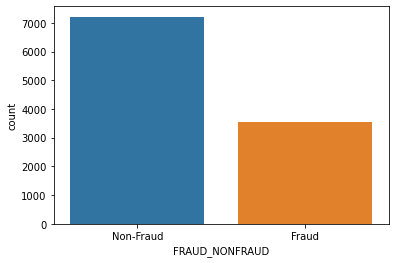

In [178]:
#Creating a barplot to show the distribution of fraud and non fraud.
sns.countplot(train['FRAUD_NONFRAUD'])
print(train['FRAUD_NONFRAUD'].value_counts(normalize= 'TRUE'))

In [179]:
train['PWD_UPDT_TS']= train['PWD_UPDT_TS'].apply(lambda x:x.toordinal())
train['CUST_SINCE_DT'] = train['CUST_SINCE_DT'].apply(lambda x:x.toordinal())
train['TRAN_TS'] = train['TRAN_TS'].apply(lambda x:x.toordinal())
train['ACTVY_DT'] = train['ACTVY_DT'].apply(lambda x:x.toordinal())

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10753 entries, 0 to 13998
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 10753 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  10753 non-null  float64
 2   CUST_AGE                 10753 non-null  int64  
 3   OPEN_ACCT_CT             10753 non-null  int64  
 4   WF_dvc_age               10753 non-null  int64  
 5   PWD_UPDT_TS              10753 non-null  int64  
 6   CARR_NAME                10753 non-null  object 
 7   RGN_NAME                 10753 non-null  object 
 8   STATE_PRVNC_TXT          10753 non-null  object 
 9   ALERT_TRGR_CD            10753 non-null  object 
 10  DVC_TYPE_TXT             10753 non-null  object 
 11  AUTHC_PRIM_TYPE_CD       10753 non-null  object 
 12  AUTHC_SCNDRY_STAT_TXT    10753 non-null  object 
 13  CUST_ZIP                 10753 non-null  int64  
 14  CUST_STATE            

In [181]:
train['FRAUD_NONFRAUD'].nunique()

2

In [182]:
train['FRAUD_NONFRAUD'] = train['FRAUD_NONFRAUD'].replace('Fraud', 1)
train['FRAUD_NONFRAUD'] = train['FRAUD_NONFRAUD'].replace('Non-Fraud', 0)

# Checking for outliers and dealing with them

In [183]:
train.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CUST_ZIP,CUST_SINCE_DT,TRAN_TS,ACTVY_DT,...,pwd_date_Hour,tran_Hour,pwd_date_DOW,tran_DOW,cust_since_DOW,activity_DOW,pwd_date_MONTH,tran_MONTH,cust_since_MONTH,activity_MONTH
count,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,...,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000,10753.000000
mean,277.803487,9506.187956,54.148796,6.421278,590.007068,737408.135404,74262.129452,729628.639263,737896.156979,737896.156979,...,10.488515,12.483307,2.954710,3.013857,2.977867,3.013857,5.824049,4.040547,6.329489,4.040547
std,308.265437,28481.126538,18.853741,8.071467,662.335396,515.139032,24726.974417,4939.255805,61.724452,61.724452,...,5.457432,4.743154,1.998906,2.002717,2.007675,2.002717,3.322608,2.023769,3.364258,2.023769
min,0.010000,0.000000,13.000000,0.000000,-117.000000,736330.000000,0.000000,693844.000000,737791.000000,737791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,11.620000,0.000000,39.000000,3.000000,64.000000,737083.000000,68104.000000,727198.000000,737847.000000,737847.000000,...,6.000000,9.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000
50%,189.430000,2392.680000,60.000000,5.000000,339.000000,737548.000000,85040.000000,729646.000000,737891.000000,737891.000000,...,10.000000,12.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,6.000000,4.000000
75%,489.160000,4405.970000,68.000000,7.000000,925.000000,737826.000000,92203.000000,731945.000000,737950.000000,737950.000000,...,14.000000,16.000000,5.000000,5.000000,5.000000,5.000000,8.000000,6.000000,9.000000,6.000000
max,2376.060000,359345.380000,105.000000,227.000000,2783.000000,738155.000000,99835.000000,737987.000000,738033.000000,738033.000000,...,23.000000,23.000000,6.000000,6.000000,6.000000,6.000000,12.000000,8.000000,12.000000,8.000000


<AxesSubplot:ylabel='CUST_SINCE_DT'>

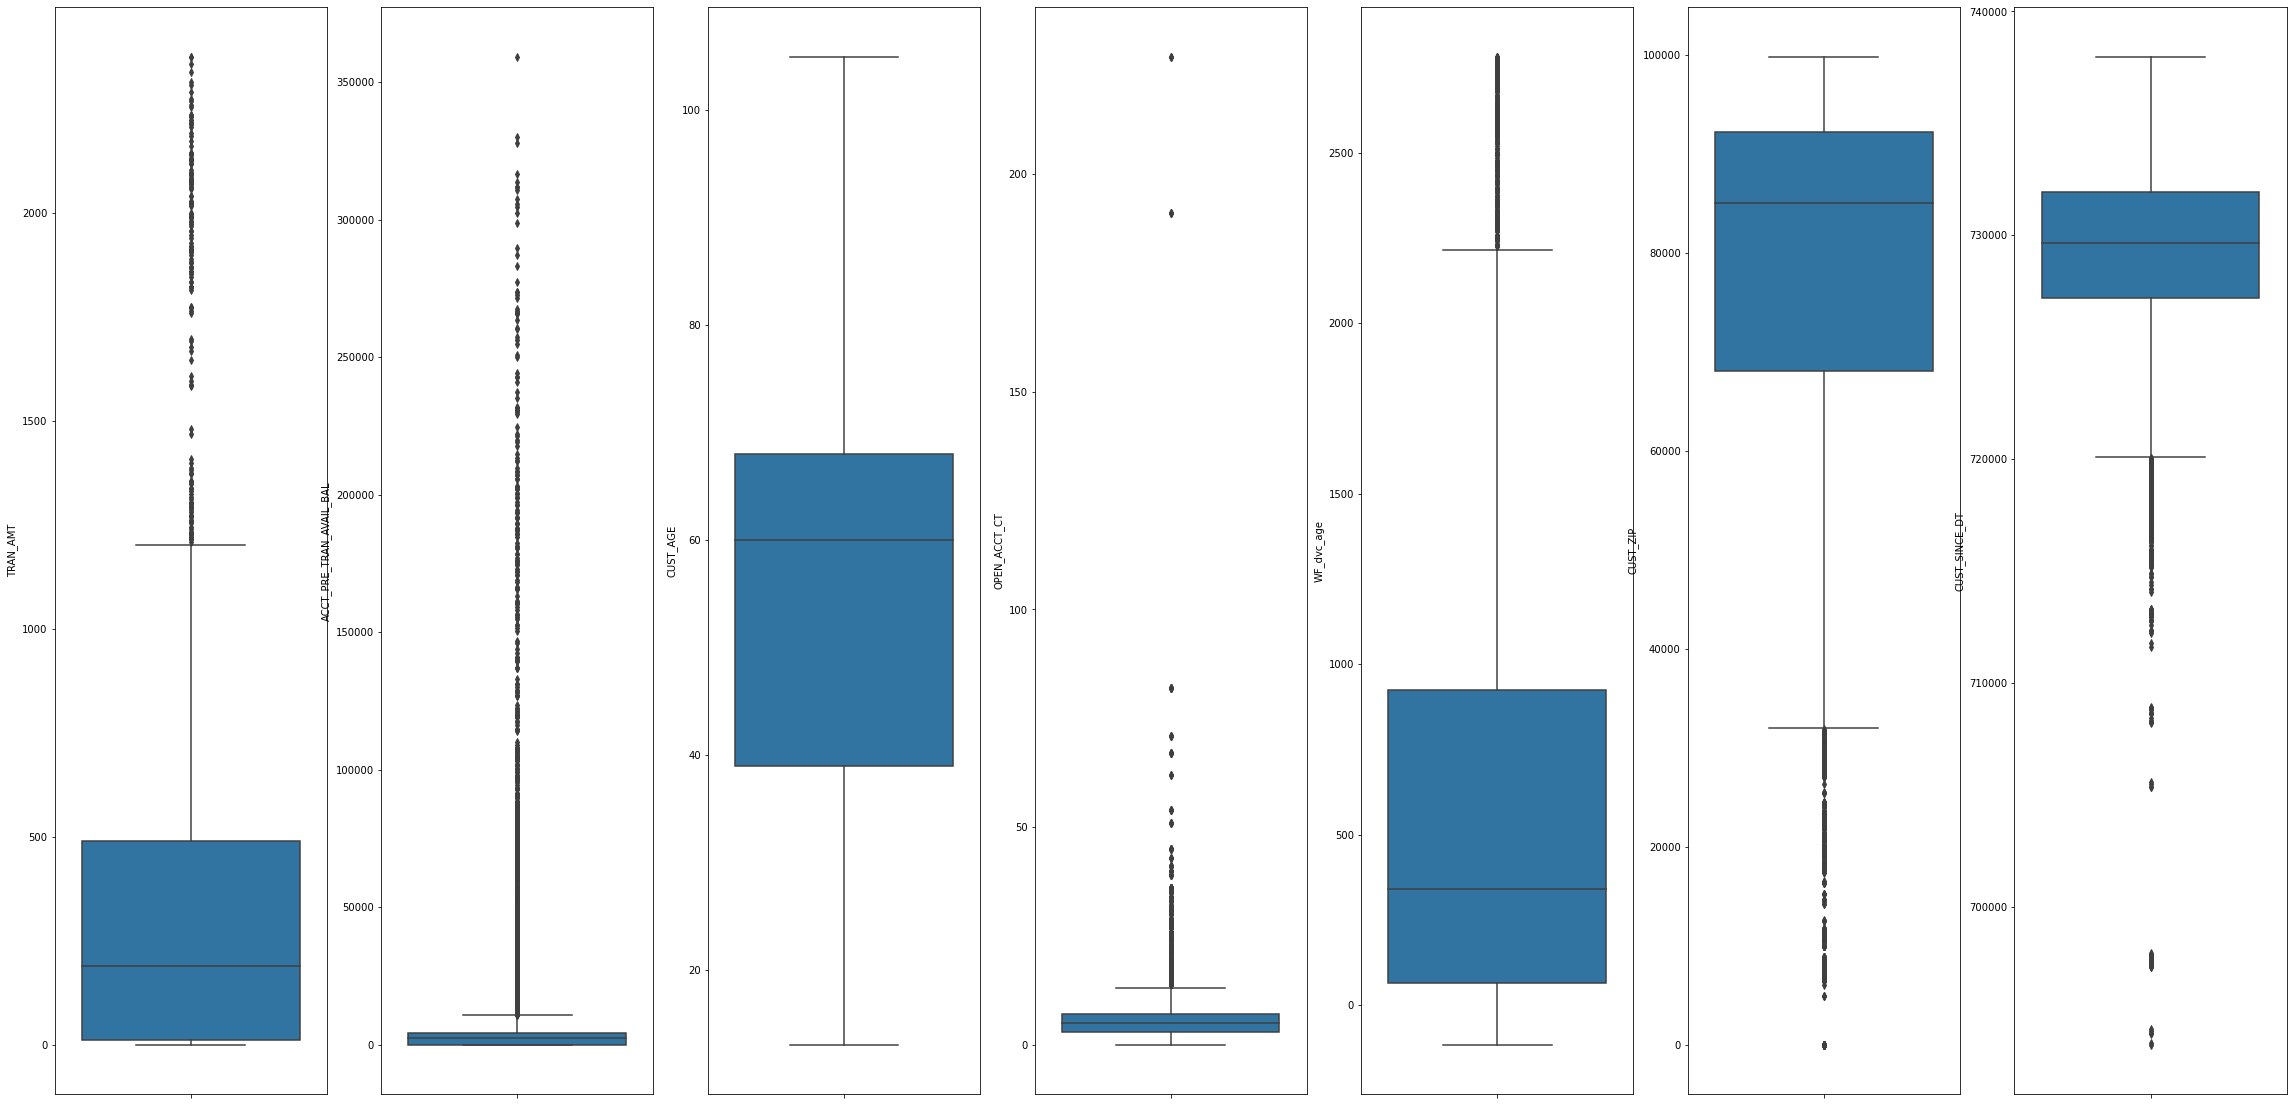

In [184]:
#creating box plot to check for outliers
plt.figure(figsize=(40, 20))
plt.subplot(1,7,1)
sns.boxplot(y = train.TRAN_AMT)

plt.subplot(1,7,2)
sns.boxplot(y = train.ACCT_PRE_TRAN_AVAIL_BAL)

plt.subplot(1,7,3)
sns.boxplot(y = train.CUST_AGE)

plt.subplot(1,7,4)
sns.boxplot(y = train.OPEN_ACCT_CT)

plt.subplot(1,7,5)
sns.boxplot(y = train.WF_dvc_age)

plt.subplot(1,7,6)
sns.boxplot(y = train.CUST_ZIP)

plt.subplot(1,7,7)
sns.boxplot(y = train.CUST_SINCE_DT)

In [185]:
def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL

In [186]:
for column in train.columns:
    if train[column].dtype != 'object':
        UL, LL = outlier_limits(train[column])
        train[column] = np.where((train[column] > UL) | (train[column] < LL), np.nan, train[column])

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10753 entries, 0 to 13998
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 10593 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  9149 non-null   float64
 2   CUST_AGE                 10753 non-null  float64
 3   OPEN_ACCT_CT             10077 non-null  float64
 4   WF_dvc_age               10394 non-null  float64
 5   PWD_UPDT_TS              10753 non-null  float64
 6   CARR_NAME                10753 non-null  object 
 7   RGN_NAME                 10753 non-null  object 
 8   STATE_PRVNC_TXT          10753 non-null  object 
 9   ALERT_TRGR_CD            10753 non-null  object 
 10  DVC_TYPE_TXT             10753 non-null  object 
 11  AUTHC_PRIM_TYPE_CD       10753 non-null  object 
 12  AUTHC_SCNDRY_STAT_TXT    10753 non-null  object 
 13  CUST_ZIP                 9681 non-null   float64
 14  CUST_STATE            

In [188]:
train.isna().sum()

TRAN_AMT                    160
ACCT_PRE_TRAN_AVAIL_BAL    1604
CUST_AGE                      0
OPEN_ACCT_CT                676
WF_dvc_age                  359
PWD_UPDT_TS                   0
CARR_NAME                     0
RGN_NAME                      0
STATE_PRVNC_TXT               0
ALERT_TRGR_CD                 0
DVC_TYPE_TXT                  0
AUTHC_PRIM_TYPE_CD            0
AUTHC_SCNDRY_STAT_TXT         0
CUST_ZIP                   1072
CUST_STATE                    0
CUST_SINCE_DT               369
TRAN_TS                       0
ACTN_CD                       0
ACTN_INTNL_TXT                0
TRAN_TYPE_CD                  0
ACTVY_DT                      0
FRAUD_NONFRAUD                0
pwd_date_Hour                 0
tran_Hour                     0
pwd_date_DOW                  0
tran_DOW                      0
cust_since_DOW                0
activity_DOW                  0
pwd_date_MONTH                0
tran_MONTH                    0
cust_since_MONTH              0
activity

In [189]:
# dropping outliers
train = train.dropna()

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7299 entries, 3 to 13998
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 7299 non-null   float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  7299 non-null   float64
 2   CUST_AGE                 7299 non-null   float64
 3   OPEN_ACCT_CT             7299 non-null   float64
 4   WF_dvc_age               7299 non-null   float64
 5   PWD_UPDT_TS              7299 non-null   float64
 6   CARR_NAME                7299 non-null   object 
 7   RGN_NAME                 7299 non-null   object 
 8   STATE_PRVNC_TXT          7299 non-null   object 
 9   ALERT_TRGR_CD            7299 non-null   object 
 10  DVC_TYPE_TXT             7299 non-null   object 
 11  AUTHC_PRIM_TYPE_CD       7299 non-null   object 
 12  AUTHC_SCNDRY_STAT_TXT    7299 non-null   object 
 13  CUST_ZIP                 7299 non-null   float64
 14  CUST_STATE             

<AxesSubplot:ylabel='CUST_SINCE_DT'>

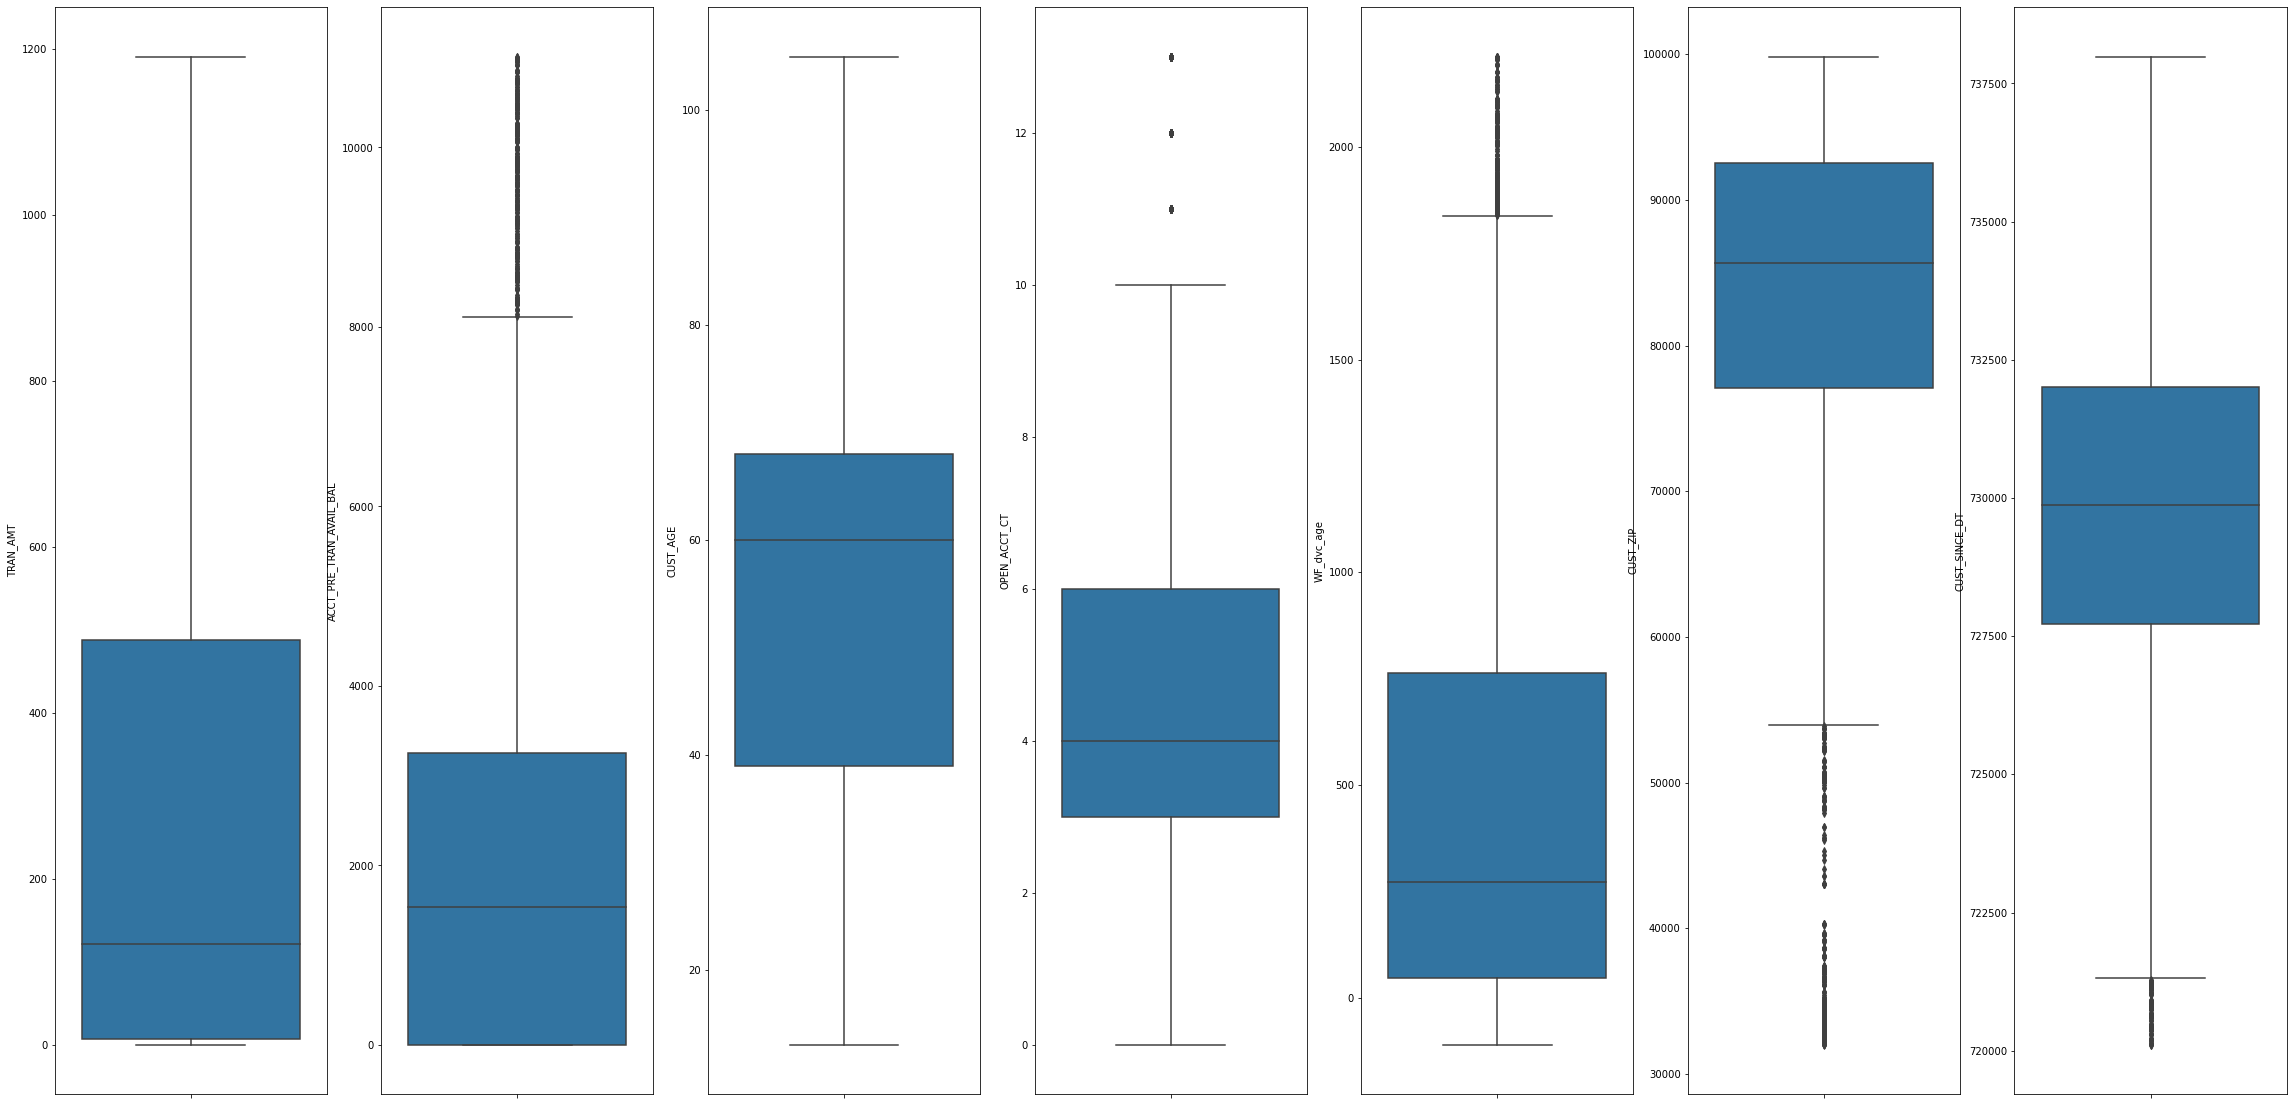

In [191]:
#creating box plot to check for outliers
plt.figure(figsize=(40, 20))
plt.subplot(1,7,1)
sns.boxplot(y = train.TRAN_AMT)

plt.subplot(1,7,2)
sns.boxplot(y = train.ACCT_PRE_TRAN_AVAIL_BAL)

plt.subplot(1,7,3)
sns.boxplot(y = train.CUST_AGE)

plt.subplot(1,7,4)
sns.boxplot(y = train.OPEN_ACCT_CT)

plt.subplot(1,7,5)
sns.boxplot(y = train.WF_dvc_age)

plt.subplot(1,7,6)
sns.boxplot(y = train.CUST_ZIP)

plt.subplot(1,7,7)
sns.boxplot(y = train.CUST_SINCE_DT)

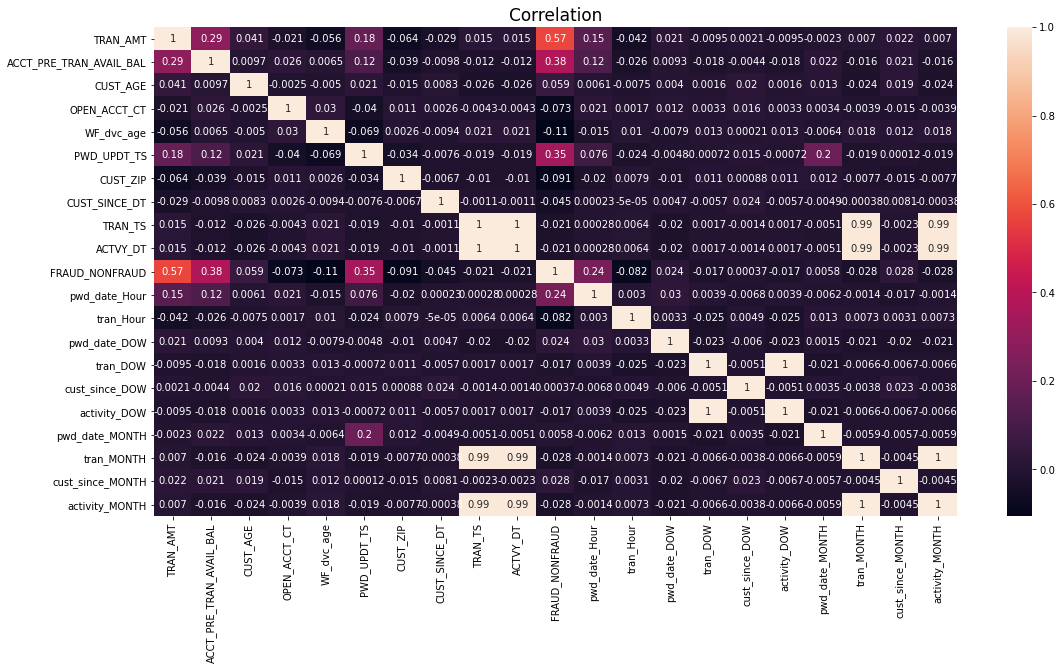

In [192]:
plt.figure(figsize=(18, 9))
sns.heatmap(data=train.corr(), annot=True)
plt.title('Correlation',size=17)
plt.show()

In [193]:
X= train.drop(columns='FRAUD_NONFRAUD')
y= train['FRAUD_NONFRAUD']

In [194]:
#Applying OneHotEncoder on the features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(X)

In [195]:
X.shape

(7299, 21455)

In [196]:
from sklearn.preprocessing import MaxAbsScaler
norm1 = MaxAbsScaler()

In [197]:
X = norm1.fit_transform(X)

# Splitting Data into Train and Validation

In [198]:
#Splitiing the data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [199]:
#getting shape of the split data
print('X Train:', x_train.shape)
print('X Valid:', x_test.shape) 
print('Y Train:', y_train.shape) 
print('Y Valid:', y_test.shape) 

X Train: (5839, 21455)
X Valid: (1460, 21455)
Y Train: (5839,)
Y Valid: (1460,)


# Models

# Linear Discriminant Analysis

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [201]:
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(x_train.toarray(), y_train)
y_pred_lda = ldaModel.predict(x_test)
print(classification_report(y_test, y_pred_lda))
confusionMatrices(ldaModel, 'Linear discriminant analysis')

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       983
         1.0       0.75      0.41      0.53       477

    accuracy                           0.76      1460
   macro avg       0.76      0.67      0.69      1460
weighted avg       0.76      0.76      0.74      1460

Linear discriminant analysis - training results
Confusion Matrix (Accuracy 0.8303)

       Prediction
Actual    0    1
     0 3663  298
     1  693 1185
Linear discriminant analysis - validation results
Confusion Matrix (Accuracy 0.7623)

       Prediction
Actual   0   1
     0 918  65
     1 282 195


# Support Vector Machine

In [202]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', probability = True)
clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)
print(classification_report(y_test, y_pred_clf))
confusionMatrices(clf, 'Support Vector Machine')

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       983
         1.0       0.90      0.86      0.88       477

    accuracy                           0.92      1460
   macro avg       0.92      0.91      0.91      1460
weighted avg       0.92      0.92      0.92      1460

Support Vector Machine - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3961    0
     1    0 1878
Support Vector Machine - validation results
Confusion Matrix (Accuracy 0.9240)

       Prediction
Actual   0   1
     0 938  45
     1  66 411


# K Nearest Neighbors

In [203]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

,k,accuracy
0,1,0.773973
1,2,0.767123
2,3,0.806849
3,4,0.795205
4,5,0.813014
5,6,0.797945
6,7,0.813699
7,8,0.806164
8,9,0.826027
9,10,0.810274


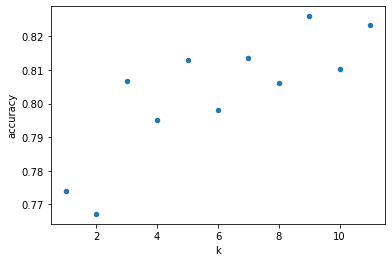

In [204]:
results = []
for k in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(x_test))
    })
results = pd.DataFrame(results)
results.plot.scatter(x='k', y='accuracy')
results

In [205]:
knn1 = KNeighborsClassifier(n_neighbors = 9).fit(x_train, y_train)
y_pred_knn = knn1.predict(x_test)
print(classification_report(y_test, y_pred_knn))
confusionMatrices(knn1, 'K Nearest Neighbors')

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       983
         1.0       0.89      0.53      0.67       477

    accuracy                           0.83      1460
   macro avg       0.85      0.75      0.77      1460
weighted avg       0.84      0.83      0.81      1460

K Nearest Neighbors - training results
Confusion Matrix (Accuracy 0.8582)

       Prediction
Actual    0    1
     0 3847  114
     1  714 1164
K Nearest Neighbors - validation results
Confusion Matrix (Accuracy 0.8260)

       Prediction
Actual   0   1
     0 952  31
     1 223 254


# Logisitic Regression

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('accuracy %2.2f ' % accuracy_score(y_test, classifier.predict(x_test)))
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))
confusionMatrices(classifier, 'Logistic regression')

accuracy 0.93 
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       983
         1.0       0.91      0.86      0.88       477

    accuracy                           0.93      1460
   macro avg       0.92      0.91      0.91      1460
weighted avg       0.93      0.93      0.93      1460

Logistic regression - training results
Confusion Matrix (Accuracy 0.9985)

       Prediction
Actual    0    1
     0 3956    5
     1    4 1874
Logistic regression - validation results
Confusion Matrix (Accuracy 0.9260)

       Prediction
Actual   0   1
     0 942  41
     1  67 410


/Users/kevoncambridge/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [207]:
classTree = DecisionTreeClassifier()
classTree.fit(x_train, y_train)

#parameters

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}


gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(x_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': list(range(2, 16)),
    'min_samples_split': [96, 97, 98, 99, 100, 101, 102, 103],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(x_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)




classTree = gridSearch.best_estimator_
y_pred_classTree = classTree.predict(x_test)
print(classification_report(y_test, y_pred))
confusionMatrices(classTree, 'Decision tree')

Initial score:  0.885598830862415
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}
Improved score:  0.8837145355730065
Improved parameters:  {'max_depth': 13, 'min_impurity_decrease': 0.0005, 'min_samples_split': 96}
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       983
         1.0       0.91      0.86      0.88       477

    accuracy                           0.93      1460
   macro avg       0.92      0.91      0.91      1460
weighted avg       0.93      0.93      0.93      1460

Decision tree - training results
Confusion Matrix (Accuracy 0.9032)

       Prediction
Actual    0    1
     0 3785  176
     1  389 1489
Decision tree - validation results
Confusion Matrix (Accuracy 0.8836)

       Prediction
Actual   0   1
     0 927  56
     1 114 363


# Bagging 

In [208]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(classTree, max_samples=0.5, max_features=0.5)
bagging.fit(x_train, y_train)
y_pred_bag = bagging.predict(x_test)
print('accuracy %2.2f ' % accuracy_score(y_test, bagging.predict(x_test)))
print(classification_report(y_test, y_pred_bag))
confusionMatrices(bagging, 'Bagging')

accuracy 0.87 
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       983
         1.0       0.92      0.66      0.77       477

    accuracy                           0.87      1460
   macro avg       0.89      0.82      0.84      1460
weighted avg       0.88      0.87      0.87      1460

Bagging - training results
Confusion Matrix (Accuracy 0.9041)

       Prediction
Actual    0    1
     0 3885   76
     1  484 1394
Bagging - validation results
Confusion Matrix (Accuracy 0.8726)

       Prediction
Actual   0   1
     0 957  26
     1 160 317


# AdaBoost

In [209]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator=classTree)
adaboost.fit(x_train, y_train)
y_pred_ada = adaboost.predict(x_test)
print('accuracy %2.2f ' % accuracy_score(y_test, adaboost.predict(x_test)))
print(classification_report(y_test, y_pred_ada))
confusionMatrices(adaboost, 'AdaBoost')

accuracy 0.90 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       983
         1.0       0.88      0.79      0.83       477

    accuracy                           0.90      1460
   macro avg       0.89      0.87      0.88      1460
weighted avg       0.89      0.90      0.89      1460

AdaBoost - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3961    0
     1    0 1878
AdaBoost - validation results
Confusion Matrix (Accuracy 0.8952)

       Prediction
Actual   0   1
     0 930  53
     1 100 377


# Random Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(max_features=3, min_samples_split=300,
 random_state=0, n_estimators=100, criterion='entropy')
rfModel.fit(x_train, y_train)

y_pred_rf = rfModel.predict(x_test)
print('accuracy %2.2f ' % accuracy_score(y_test, rfModel.predict(x_test)))
print(classification_report(y_test, y_pred_rf))
confusionMatrices(rfModel, 'Random Forest')

accuracy 0.69 
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.81       983
         1.0       1.00      0.06      0.12       477

    accuracy                           0.69      1460
   macro avg       0.84      0.53      0.47      1460
weighted avg       0.79      0.69      0.59      1460

Random Forest - training results
Confusion Matrix (Accuracy 0.8328)

       Prediction
Actual    0    1
     0 3961    0
     1  976  902
Random Forest - validation results
Confusion Matrix (Accuracy 0.6938)

       Prediction
Actual   0   1
     0 983   0
     1 447  30


# Naive Bayes

In [211]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01)
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
print('accuracy %2.2f ' % accuracy_score(y_test, nb.predict(x_test)))
print(classification_report(y_test, y_pred_nb))
confusionMatrices(nb, 'Naive Bayes')

accuracy 0.93 
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       983
         1.0       0.87      0.92      0.90       477

    accuracy                           0.93      1460
   macro avg       0.92      0.93      0.92      1460
weighted avg       0.93      0.93      0.93      1460

Naive Bayes - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3961    0
     1    0 1878
Naive Bayes - validation results
Confusion Matrix (Accuracy 0.9301)

       Prediction
Actual   0   1
     0 920  63
     1  39 438


# Neural Network

In [212]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#scaleInput = MinMaxScaler()
#scaleInput.fit(x_train * 1.0)

from sklearn.preprocessing import MaxAbsScaler
scaleInput = MaxAbsScaler().fit(X)

neuralNet = MLPClassifier(hidden_layer_sizes=(10), 
                          activation='logistic',
                          solver='lbfgs',
                          max_iter=3000,
                          random_state=1)
neuralNet.fit(scaleInput.transform(x_train), y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=3000,
              random_state=1, solver='lbfgs')

In [213]:
y_pred_nn = neuralNet.predict(x_test)
print('accuracy %2.2f ' % accuracy_score(y_test, neuralNet.predict(x_test)))
print(classification_report(y_test, y_pred_nn))
confusionMatrices(neuralNet, 'Neural Network')

accuracy 0.91 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       983
         1.0       0.87      0.86      0.87       477

    accuracy                           0.91      1460
   macro avg       0.90      0.90      0.90      1460
weighted avg       0.91      0.91      0.91      1460

Neural Network - training results
Confusion Matrix (Accuracy 0.9993)

       Prediction
Actual    0    1
     0 3958    3
     1    1 1877
Neural Network - validation results
Confusion Matrix (Accuracy 0.9130)

       Prediction
Actual   0   1
     0 923  60
     1  67 410


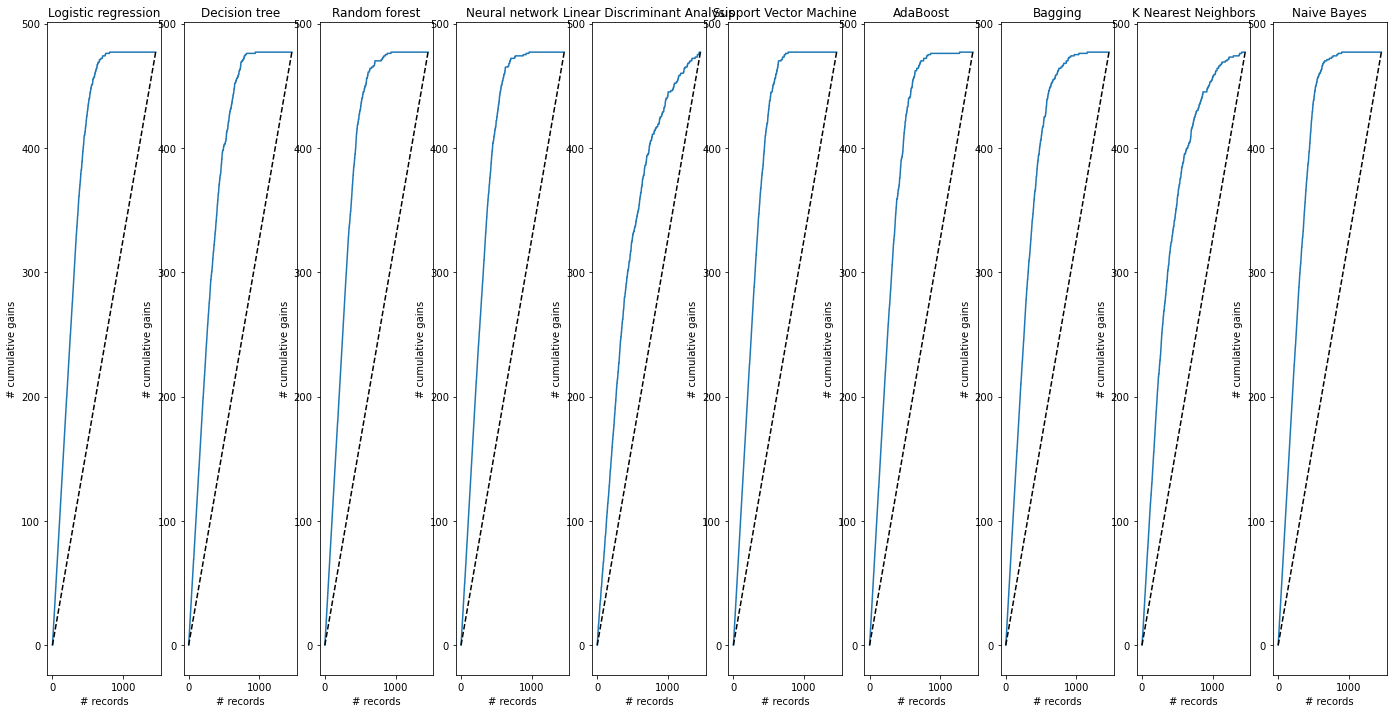

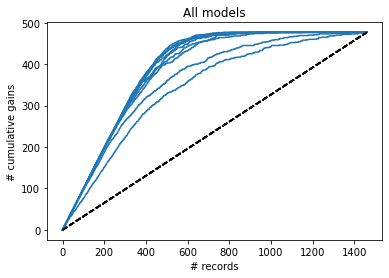

In [230]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(24, 12))

def modelGainsChart(model, title, ax=None):
    result = pd.DataFrame({
        'actual': y_test,
        'prob': model.predict_proba(x_test)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    ax = gainsChart(result.actual, ax=ax)
    ax.set_title(title)
    return ax

modelGainsChart(classifier, 'Logistic regression', axes[0])
modelGainsChart(classTree, 'Decision tree', axes[1])
modelGainsChart(rfModel, 'Random forest', axes[2])
modelGainsChart(neuralNet, 'Neural network', axes[3])
modelGainsChart(ldaModel, 'Linear Discriminant Analysis', axes[4])
modelGainsChart(clf, 'Support Vector Machine', axes[5])
modelGainsChart(adaboost, 'AdaBoost', axes[6])
modelGainsChart(bagging, 'Bagging', axes[7])
modelGainsChart(knn1, 'K Nearest Neighbors', axes[8])
modelGainsChart(nb, 'Naive Bayes', axes[9])

ax = modelGainsChart(classifier, 'Logistic regression')
modelGainsChart(classTree, 'Decision tree', ax)
modelGainsChart(rfModel, 'Random forest', ax)
modelGainsChart(neuralNet, 'Neural network', ax)
modelGainsChart(ldaModel, 'Linear Discriminant Analysis', ax)
modelGainsChart(clf, 'Support Vector Machine', ax)
modelGainsChart(adaboost, 'AdaBoost', ax)
modelGainsChart(bagging, 'Bagging', ax)
modelGainsChart(knn1, 'K Nearest Neighbors', ax)
modelGainsChart(nb, 'Naive Bayes', ax)
ax.set_title('All models')
plt.show()